## Business Understanding

## Workflow Analysis

## Import Data

In [273]:
# Import library that needs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [274]:
# Load dataset
retail_df = pd.read_csv("../data/online_retail.csv")

In [275]:
# Create function to read dataframe

def load_dataset(data_path):
    """
    Function to read dataset with csv extension, check either have any duplicate data.

    Parameters:
    -----------
    data_path : str
        Path for load the data

    Returns
    -------
    retail_df : pandas DataFrame
        Retail dataset in dataframe type
    """
    # Load dataset
    retail_df = pd.read_csv(data_path, low_memory=False)

    # Drop any duplicate data
    retail_df = retail_df.drop_duplicates()

    # Show the shape of data
    print("Shape of data :", retail_df.shape)

    return retail_df

In [276]:
# Load data
data_path = "../data/online_retail.csv"

retail_df = load_dataset(data_path)

Shape of data : (65796, 13)


In [277]:
# Check the data using .head()
retail_df.head()

,Customer_ID,Invoice,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,NaN,489548,53,Male,45.3,2,22.06.21,24.915,Cards,885,Chrome,Not Subsribed,Not Used
1,NaN,489549,18,Female,36.2,3,10.12.21,2.896,Paypal,656,Chrome,Not Subsribed,Used
2,NaN,489550,52,Female,10.6,1,14.03.21,10.600,Digital Wallets,761,Chrome,Subsribed,Not Used
3,NaN,489551,29,Male,54.1,5,25.10.21,43.280,Cards,906,Chrome,Subsribed,Not Used
4,NaN,489552,21,Female,56.9,1,14.09.21,56.900,Cards,605,Chrome,Subsribed,Not Used


In [278]:
# Check if there's any duplicate value
retail_df.duplicated().sum()

0

In [279]:
# Check data types for all columns
retail_df.dtypes

Customer_ID       float64
Invoice             int64
Age                 int64
Gender             object
Revenue_Total     float64
N_Purchases         int64
Purchase_DATE      object
Purchase_VALUE    float64
Pay_Method         object
Time_Spent          int64
Browser            object
Newsletter         object
Voucher            object
dtype: object

In [280]:
# Change the datatype of "Purchase_DATE" from object to timeseries.
# Replace "." char to "-"
retail_df["Purchase_DATE"] = retail_df["Purchase_DATE"].str.replace(".","-")

C:\Users\Axel\AppData\Local\Temp\ipykernel_17480\4114209839.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  retail_df["Purchase_DATE"] = retail_df["Purchase_DATE"].str.replace(".","-")


In [281]:
# Replace `21` in 2 last characters to `2021`
retail_df["Purchase_DATE"] = retail_df["Purchase_DATE"].str[:-2] + '20' + retail_df["Purchase_DATE"].str[-2:]

In [282]:
# Typecasting format of column `Purchase_DATE` to datetime
retail_df["Purchase_DATE"] = pd.to_datetime(retail_df["Purchase_DATE"],infer_datetime_format=True)

In [283]:
# Validate of "Purchase_DATE" column data types
retail_df.dtypes

Customer_ID              float64
Invoice                    int64
Age                        int64
Gender                    object
Revenue_Total            float64
N_Purchases                int64
Purchase_DATE     datetime64[ns]
Purchase_VALUE           float64
Pay_Method                object
Time_Spent                 int64
Browser                   object
Newsletter                object
Voucher                   object
dtype: object

## Exporatory Data Analysis

In [284]:
# Create the copy of data so the data wouldn't be overwritten
retail_eda = retail_df.copy()

# Validate the shape of data
print("Shape of `retail_df`:", retail_df.shape)
print("Shape of `retail_eda`:", retail_eda.shape)

Shape of `retail_df`: (65796, 13)
Shape of `retail_eda`: (65796, 13)


In [285]:
# Check statistical descriptive of dataset (For numerical columns)
retail_eda.describe()

,Customer_ID,Invoice,Age,Revenue_Total,N_Purchases,Purchase_VALUE,Time_Spent
count,65399.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000
mean,504930.113656,522445.500000,39.592696,27.732935,3.992477,15.968699,598.925603
std,205.567125,18993.813493,13.825466,14.941878,2.004370,13.229295,277.833635
min,504308.000000,489548.000000,16.000000,0.500000,1.000000,0.005000,120.000000
25%,504810.000000,505996.750000,28.000000,15.300000,2.000000,4.819750,358.000000
50%,504979.000000,522445.500000,40.000000,30.100000,4.000000,12.640000,598.000000
75%,505096.000000,538894.250000,51.000000,37.600000,6.000000,24.752000,840.000000
max,505188.000000,555343.000000,63.000000,59.900000,7.000000,59.900000,1080.000000


- All values is positive, which is rational because neither of value can be negative
- There are potential outlier in `Revenue_Total`, `Purchase_Value`, and `Time_Spent`. Need further analysis to proof 

In [286]:
# Check possibilities of missing values
retail_eda.isna().sum()

Customer_ID       397
Invoice             0
Age                 0
Gender              0
Revenue_Total       0
N_Purchases         0
Purchase_DATE       0
Purchase_VALUE      0
Pay_Method          0
Time_Spent          0
Browser             0
Newsletter          0
Voucher             0
dtype: int64

`Column_ID` columns has some NaN value. Check the column first to handling missing values

In [287]:
retail_eda[retail_eda['Customer_ID'].isna()]

,Customer_ID,Invoice,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,NaN,489548,53,Male,45.3,2,2021-06-22,24.915,Cards,885,Chrome,Not Subsribed,Not Used
1,NaN,489549,18,Female,36.2,3,2021-12-10,2.896,Paypal,656,Chrome,Not Subsribed,Used
2,NaN,489550,52,Female,10.6,1,2021-03-14,10.600,Digital Wallets,761,Chrome,Subsribed,Not Used
3,NaN,489551,29,Male,54.1,5,2021-10-25,43.280,Cards,906,Chrome,Subsribed,Not Used
4,NaN,489552,21,Female,56.9,1,2021-09-14,56.900,Cards,605,Chrome,Subsribed,Not Used
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5952,NaN,495500,21,Female,39.2,7,2021-03-23,31.752,Paypal,217,Safari,Not Subsribed,Used
5953,NaN,495501,44,Female,16.8,6,2021-12-23,5.544,Others,548,Chrome,Not Subsribed,Not Used
5954,NaN,495502,59,Male,38.5,2,2021-12-14,1.925,Digital Wallets,974,Safari,Not Subsribed,Not Used
5955,NaN,495503,44,Female,15.7,2,2021-11-11,7.536,Cards,239,Edge,Not Subsribed,Used


- For create RFM Analysis, we should aggregate data by each transaction by `Customer_ID`
- Which mean we should drop this missing values

In [288]:
# Drop the missing record for `Customer_ID`
# Before dropping the missing values
print('Shape before dropping missing values:', retail_eda.shape)

# Drop NaN values
retail_eda = retail_eda[~retail_eda['Customer_ID'].isna()]

print('Shape after dropping missing values:', retail_eda.shape)

Shape before dropping missing values: (65796, 13)
Shape after dropping missing values: (65399, 13)


In [289]:
# Validation of NaN values
retail_eda.isna().sum()

Customer_ID       0
Invoice           0
Age               0
Gender            0
Revenue_Total     0
N_Purchases       0
Purchase_DATE     0
Purchase_VALUE    0
Pay_Method        0
Time_Spent        0
Browser           0
Newsletter        0
Voucher           0
dtype: int64

In [290]:
# Check for Invoice Columns
retail_eda['Invoice'].value_counts()

489634    1
533550    1
533537    1
533538    1
533539    1
         ..
511749    1
511750    1
511751    1
511752    1
555343    1
Name: Invoice, Length: 65399, dtype: int64

- There are no duplicate value in `Invoice`

In [291]:
# Check total unique Customer_ID
len(set(retail_eda['Customer_ID']))

881

In [292]:
# Check First and Last Transaction in Retail
print(f'Date of First Transaction is :', {str(retail_eda["Purchase_DATE"].min())})
print(f'Date of First Transaction is :', {str(retail_eda["Purchase_DATE"].max())})

Date of First Transaction is : {'2021-01-01 00:00:00'}
Date of First Transaction is : {'2022-01-01 00:00:00'}


- From analysis above, we conclude that data consist of 1 years transaction

## Create RFM Features

In [293]:
# Set the last trasaction data to became the reference date
last_trans_date = pd.to_datetime('2022-01-01')

last_trans_date

Timestamp('2022-01-01 00:00:00')

In [294]:
# Create function to make RFM Analysis
def recency_value(x):
    """"""
    return (last_trans_date - x.max()).days

def tenure_value(x):
    """"""
    return (x.max() - x.min()).days

def frequency_value(x):
    """"""
    return len(set(x))

def retrieve_rfmts(df):
    """"""
    # Generate value of sales transaction --> Sales = N_Purchases x Purchase_VALUE
    df["Sales"] = df["N_Purchases"] * df["Purchase_VALUE"]

    # Aggregate by 'Customer_ID' to retrieve RFM + TS
    dict_agg_data = {
        'Purchase_DATE' : [recency_value, tenure_value],
        'Invoice' : frequency_value,
        'Sales' : 'sum'
    }

    rfm_ts_data = df.groupby('Customer_ID').agg(dict_agg_data)

    # Change name of column
    rfm_ts_data.columns = ['Recency', 'Tenure', 'Frequency', 'Monetary']

    # Change type of index
    rfm_ts_data.index = rfm_ts_data.index.astype('int')

    return rfm_ts_data

In [295]:
rfm_data_eda = retrieve_rfmts(df = retail_eda)

# Validate the output
# Rows of rfm_data_eda == unique number of Customer_ID
print('Shape of RFM datashape :', rfm_data_eda.shape)
assert rfm_data_eda.shape[0] == len(set(retail_eda['Customer_ID']))

Shape of RFM datashape : (881, 4)


In [296]:
# Do sanity check
rfm_data_eda.head()

,Recency,Tenure,Frequency,Monetary
Customer_ID,,,,
504308,1,362,450,25499.332
504309,40,322,10,892.388
504310,4,288,8,682.436
504311,33,290,9,736.446
504312,11,220,5,54.155


In [297]:
# Check data description of `rfm_data_eda`
rfm_data_eda.describe()

,Recency,Tenure,Frequency,Monetary
count,881.000000,881.000000,881.000000,881.000000
mean,10.518729,343.486947,74.232690,4298.080144
std,19.044205,31.567390,57.813762,3370.302997
min,0.000000,114.000000,3.000000,54.155000
25%,1.000000,340.000000,23.000000,1331.508000
50%,4.000000,356.000000,59.000000,3467.950000
75%,12.000000,361.000000,118.000000,6848.626000
max,199.000000,365.000000,450.000000,25499.332000


- Based on EDA on statistical descriptive in `rfm_data_eda`, there is no negative value in all columns

#### Check for `Frequency` & `Tenure`

In [298]:
# Check for frequency == 1 in rfm_data_eda
rfm_data_eda[rfm_data_eda['Frequency'] == 1]

,Recency,Tenure,Frequency,Monetary
Customer_ID,,,,


- There are no one on time purchaser
- Check customer tenure = 0 
- We want to know is there any customer with tenure = 0 and frequency > 1

In [299]:
# Check for tenure == 0 in rfm_data_eda
rfm_data_eda[rfm_data_eda['Tenure'] == 0]

,Recency,Tenure,Frequency,Monetary
Customer_ID,,,,


- We can conclude that there are no one customer

- Check for `Monetary`

In [300]:
# Monetary
rfm_data_eda[rfm_data_eda['Frequency'] == 1]['Monetary'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Monetary, dtype: float64

**Summary**
- There are no one customer who be the one-time purchaser on data

#### Data Distribution

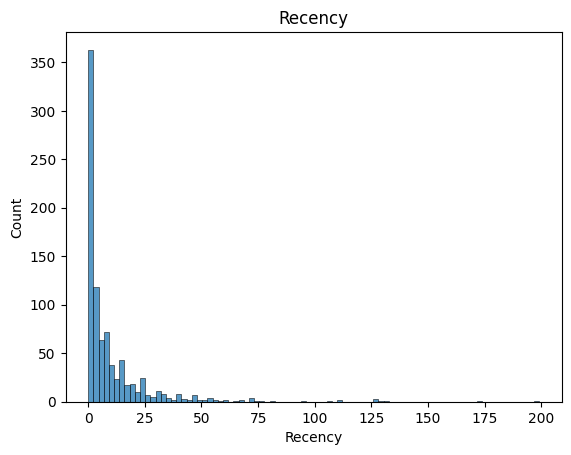

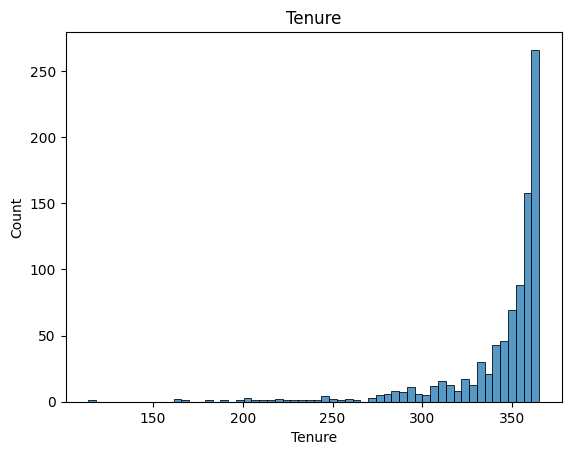

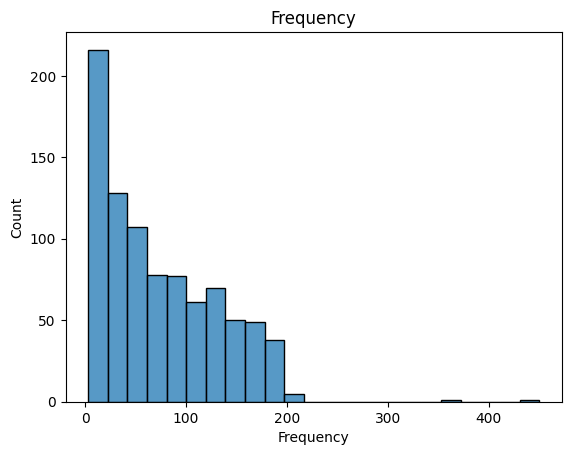

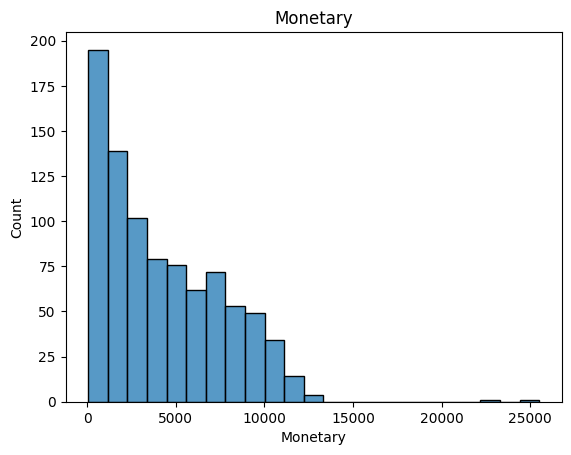

In [301]:
# Try to plot the distribution
for col in rfm_data_eda.columns:
    x = rfm_data_eda[col]
    sns.histplot(x)
    plt.title(col)
    plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1dc16a5b280>,
 'caps': [<matplotlib.lines.Line2D at 0x1dc16a5b820>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dc16a5afb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1dc16a5bdc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dc16a8c0d0>],
 'means': []}

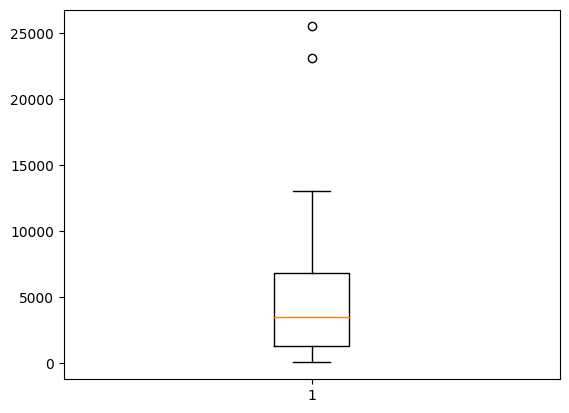

In [ ]:
plt.boxplot(rfm_data_eda['Monetary'])

**Summary**
- The distribution is skew for all columns. Try further analysis to determine is there any outliers
- Use IQR method to determine

In [304]:
# Drop ouliers
def drop_outlier(df, columns):
    """
    Function to remove record that exceed the outliers value determine by IQR

    Parameters
    ----------
    df : pandas DataFrame
        Sample of data

    columns : list
        Name of columns that want to drop the outliers

    Returns
    -------
    clean_df : pandas DataFrame
        Data that has been drop outliers
    """
    # Copy dataframe
    clean_df = df.copy()

    # Iteration for all columns and record
    for column in columns:
        # Calculate value of IQR
        q1, q3 = np.quantile(clean_df[column], q=[0.25, 0.75])
        iqr = q3 - q1
        upper_bond = q3 + 1.5*iqr 
        lower_bond = q1 - 1.5*iqr

        # Filter data based on iqr
        data_condition_1 = clean_df[column] <= upper_bond
        data_condition_2 = clean_df[column] >= lower_bond
        clean_df = clean_df[data_condition_1&data_condition_2]

    return clean_df


In [305]:
# Drop the outliers by function
rfm_data_eda = drop_outlier(df = rfm_data_eda,
                            columns = ['Recency','Tenure','Frequency','Monetary'])

# Data validation
print('Shape of EDA data :', rfm_data_eda.shape)
rfm_data_eda.describe()

Shape of EDA data : (733, 4)


,Recency,Tenure,Frequency,Monetary
count,733.000000,733.000000,733.000000,733.000000
mean,5.038199,354.787176,85.377899,4944.521000
std,5.841828,9.549325,53.359748,3102.858155
min,0.000000,325.000000,7.000000,419.437000
25%,1.000000,350.000000,39.000000,2203.387000
50%,3.000000,358.000000,77.000000,4443.646000
75%,7.000000,362.000000,128.000000,7399.816000
max,28.000000,365.000000,210.000000,13037.662000


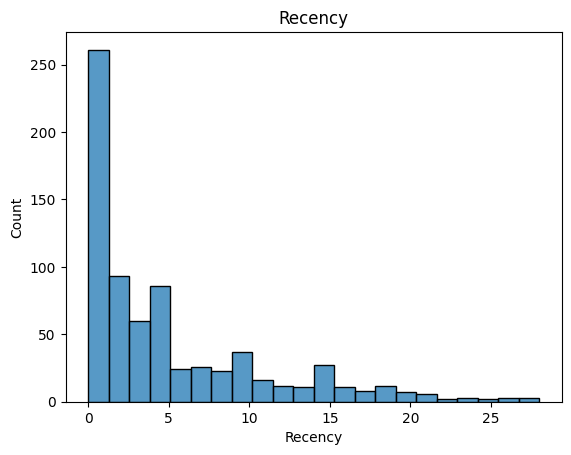

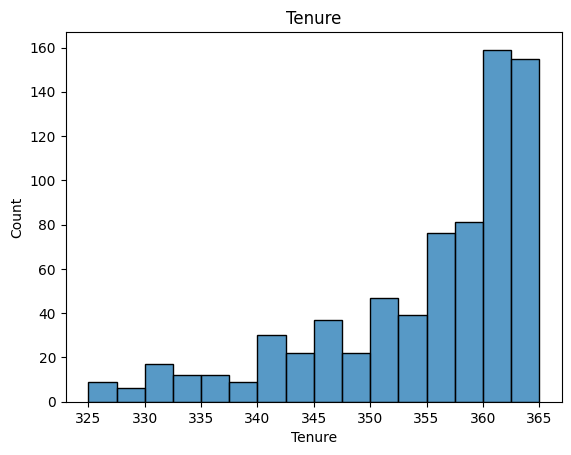

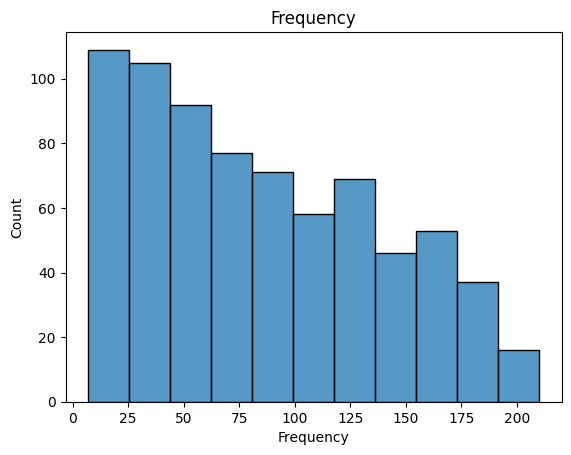

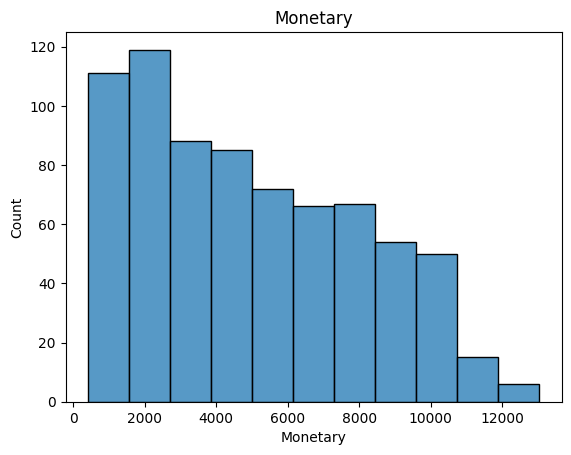

In [306]:
# Try to plot the distribution
for col in rfm_data_eda.columns:
    x = rfm_data_eda[col]
    sns.histplot(x)
    plt.title(col)
    plt.show()

### Data Preprocessing

#### Preprocess Raw Data

In [310]:
# Create function to preprocess data
def preprocess_data(df):
    """
    Function to preprocess data to RFM data

    Parameters
    ----------
    df : pandas DataFrame
        Raw data
    
    Returns
    -------
    rfm_data : pandas DataFrame
        The RFM dataset
    """
    # Drop missing values in `Customer_ID`
    raw_data = df[~df['Customer_ID'].isna()]

    # Generate RFM dataset
    rfm_data = retrieve_rfmts(df = raw_data)

    # Create RFM data validation
    print("Shape of data shape :", rfm_data.shape)
    assert rfm_data.shape[0] == len(set(raw_data['Customer_ID']))

    return rfm_data

In [311]:
# Generate RFM DataFrame
rfm_data = preprocess_data(df = retail_eda)

rfm_data.head()

Shape of data shape : (881, 4)


,Recency,Tenure,Frequency,Monetary
Customer_ID,,,,
504308,1,362,450,25499.332
504309,40,322,10,892.388
504310,4,288,8,682.436
504311,33,290,9,736.446
504312,11,220,5,54.155


#### Preprocess RFM Dataset

In [314]:
def preprocess_rfm_data(rfm_data):
    """
    Function to preprocecc RFM dataset

    Parameters
    ----------
    rfm_data : pandas DataFrame
        Sample of RFM data

    Returns
    -------
    clean_df : pandas DataFrame
        RFM DataFrame
    """
    # Filter frequency
    freq_data = rfm_data[rfm_data['Frequency'] >= 2]

    # Drop outliers
    clean_df = drop_outlier(df = freq_data,
                            columns = ['Recency','Tenure','Frequency','Monetary'])

    # Filter data
    clean_df = clean_df[['Recency','Frequency','Monetary']] 

    # Data Validation
    print("Shape of data:", clean_df.shape)

    return clean_df

In [315]:
# Generate the clean RFM data
rfm_clean_data = preprocess_rfm_data(rfm_data = rfm_data)

rfm_clean_data.describe()

Shape of data: (733, 3)


,Recency,Frequency,Monetary
count,733.000000,733.000000,733.000000
mean,5.038199,85.377899,4944.521000
std,5.841828,53.359748,3102.858155
min,0.000000,7.000000,419.437000
25%,1.000000,39.000000,2203.387000
50%,3.000000,77.000000,4443.646000
75%,7.000000,128.000000,7399.816000
max,28.000000,210.000000,13037.662000


- Outliers has been removed